In [1]:
# Load our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import string

# Load data
dataSet = pd.read_csv("datasets/final.csv", index_col = [0], low_memory = False)

In [2]:
# How many Datas
print(f"Total Datas: {dataSet.shape}")
Input = int(input("How many Datas you want to analyze: "))

Total Datas: (3169996, 14)
How many Datas you want to analyze: 10000


In [3]:
# Create "StoreName" columns based on StoreCode
def Store_name(value):
    if value == "19 Below":
        return "1"
    elif value == "20~29":
        return "2"
    elif value == "30~39":
        return "3"
    elif value == "40~49":
        return "4"
    else:
        return "5"

In [4]:
# Create function to format the time stamp to date-time object
def get_time(value):
    temp = str.replace(value, "/", "-")
    count1 = temp.count(":")
    if count1 == 1:
        temp = temp + ":00"
    return datetime.strptime(temp, "%Y-%m-%d %H:%M:%S")

In [6]:
# Choose Age
dataSet["AgeCode"] = dataSet["Age"].head(Input).apply(Store_name)
dataSet["TimeEnter"] = dataSet["EnterTime"].head(Input).apply(get_time)
dataSet["TimeLeave"] = dataSet["LeaveTime"].head(Input).apply(get_time)

In [7]:
# How many hours spent
dataSet["Spend(hours)"] = ((dataSet["TimeLeave"] - dataSet["TimeEnter"]) / np.timedelta64(1, "s")) / 3600

age = ["19 Below", "20~29", "30~39", "40~49", "50 Above"] # label
spend = [0, 0, 0, 0, 0]
count = [0, 0, 0, 0, 0]
average = [0, 0, 0, 0, 0]

data1 = dataSet[(dataSet["AgeCode"] == "1")]
data2 = dataSet[(dataSet["AgeCode"] == "2")]
data3 = dataSet[(dataSet["AgeCode"] == "3")]
data4 = dataSet[(dataSet["AgeCode"] == "4")]
data5 = dataSet[(dataSet["AgeCode"] == "5")]

In [8]:
for i in dataSet["AgeCode"]:
    if i == "1":
        count[0] += 1
        for i in data1["Spend(hours)"]:
            spend[0] += float(i)
    elif i == "2":
        count[1] += 1
        for i in data2["Spend(hours)"]:
            spend[1] += float(i)
    elif i == "3":
        count[2] += 1
        for i in data3["Spend(hours)"]:
            spend[2] += float(i)
    elif i == "4":
        count[3] += 1
        for i in data4["Spend(hours)"]:
            spend[3] += float(i)
    elif i == "5":
        count[4] += 1
        for i in data5["Spend(hours)"]:
            spend[4] += float(i)

spend[0] /= len(data1["Spend(hours)"])
spend[1] /= len(data2["Spend(hours)"])
spend[2] /= len(data3["Spend(hours)"])
spend[3] /= len(data4["Spend(hours)"])
spend[4] /= len(data5["Spend(hours)"])

In [9]:
# 花費時間取小數點第二位
for i in range(len(spend)):
    spend[i] = round(spend[i], 2)

In [10]:
# 平均值取小數第二位
#total spent time / total people in same age
for i in range(len(average)):
    average[i] = spend[i] / count[i]
    average[i] = round(average[i], 2)
print(f"count: {count}")
print(f"spend: {spend}")
print(f"average: {average}")
color = ['r', 'b', 'g', 'y', 'm']

count: [269, 2104, 5373, 1692, 562]
spend: [1081.17, 8722.87, 23801.32, 7670.37, 2475.12]
average: [4.02, 4.15, 4.43, 4.53, 4.4]


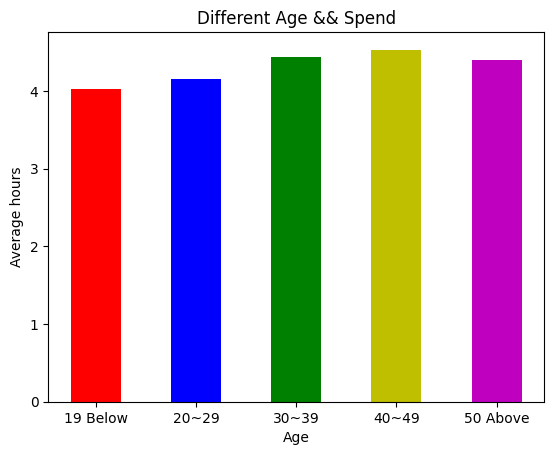

In [11]:
for i in range(0, 5):
    plt.bar(age[i], average[i], color = color[i], width = 0.5)
plt.title("Different Age && Spend")  # title
plt.xlabel("Age")   # x label
plt.ylabel("Average hours") # y label
plt.show()